# Load the data and fit a simple model
This simple example shows you how to load the data into a jupyter notebook and fit a simple model.

In [1]:
# Load in some libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline

### Load in the data

In [2]:
# Relative path to data
trainPath = '../../data/train.csv'
testPath = '../../data/test.csv'

dataTrain = pd.read_csv(trainPath)
dataTest = pd.read_csv(testPath)

### Look at the data

In [3]:
print "Shape of training data: " + str(dataTrain.shape)
print "Shape of test data: " + str(dataTest.shape)

Shape of training data: (1460, 81)
Shape of test data: (1459, 80)


In [4]:
dataTrain.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Now look at the distribution of sale prices:

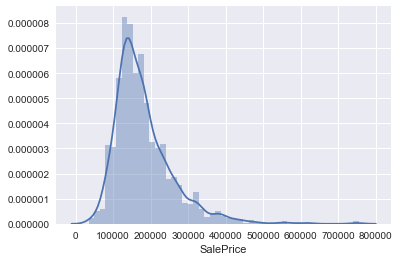

In [5]:
sns.distplot(dataTrain['SalePrice']);

### Do some preprocessing

First, let's drop the Id column as this shouldn't be predictive.

In [6]:
dataTrain.drop("Id", axis=1, inplace=True)
dataTest.drop("Id", axis=1, inplace=True)

Now, let's encode the dummy variables and fill in missing values.

In [7]:
# Train data
dataTrain = pd.get_dummies(dataTrain)
dataTrain = dataTrain.fillna(dataTrain.mean()) # Impute the mean to missing values. Not necc. a good idea!

# Test data
dataTest = pd.get_dummies(dataTest)
dataTest = dataTest.fillna(dataTest.mean()) # Impute the mean to missing values. Not necc. a good idea!

### Fit a model!

First pull out the response variable "SalePrice"

In [8]:
y = dataTrain.pop('SalePrice')
X = dataTrain

print "Shape of training data: " + str(X.shape)
print "Shape of training response: " + str(y.shape)

Shape of training data: (1460, 288)
Shape of training response: (1460,)


Now, break the data into training and validation sets.

In [9]:
# Fraction of examples to hold out for validation
validFrac = 0.33

X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                      test_size=validFrac,
                                                      random_state=4)

print "Shape of training data: " + str(X_train.shape)
print "Shape of training response: " + str(y_train.shape)
print "Shape of validation data: " + str(X_valid.shape)
print "Shape of validation response: " + str(y_valid.shape)

Shape of training data: (978, 288)
Shape of training response: (978,)
Shape of validation data: (482, 288)
Shape of validation response: (482,)


We can go ahead and fit a model:

In [10]:
model = RandomForestRegressor(verbose=True)
model.fit(X_train, np.log(y_train))

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=True, warm_start=False)

### Evaluate the model

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


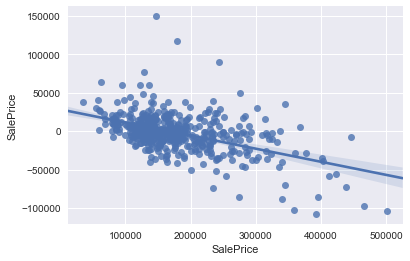

In [11]:
# Predict on new data and plot the results
yPred = np.exp(model.predict(X_valid))

# Plot the results
sns.regplot(x=y_valid, y=yPred-y_valid);

In [12]:
# Evaluate the rms error:
rmse = np.sqrt(mean_squared_error(yPred, y_valid))

print "Typical error in housing sale price prediction: $" + str(rmse)

Typical error in housing sale price prediction: $25241.6011549
